<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2023S2/blob/main/Lab_avaliativo_1bb_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab Avaliativo

Conceitos verificados neste Lab:

1. Construção em camadas do `Matplotlib` e seus elementos básicos
2. Como empregar os modos `script layer` e `artist layer`
3. Explorar gráficos de linha e de distribuição e relações

**Ao final do Lab, faça um print do seu Colab em .pdf poste seu .pdf e compartilhe o link do seu Colab para leitura.**

<br>

Referências:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1

Produza em um mesmo gráfico o gráfico de linha das funções:

1. $f(x) = tanh(x^2)$ (empregue `np.tanh()`), e

2. $g(x) = $ `np.random.sample(len(x)) - 0.5`

para $x \in [-10,10]$.

1. Inclua um título com a função
2. Empregue uma linha informando um código RGB para as cores de sua escolha com estilo pontilhado para função $f(x)$ e estilo sólido para função $g(x)$
3. Altere o tamanho da figura para 8x5
4. Inclua rótulos para os eixos do gráfico
5. Adicione os labels `f(x)` e `g(x)` para cada função

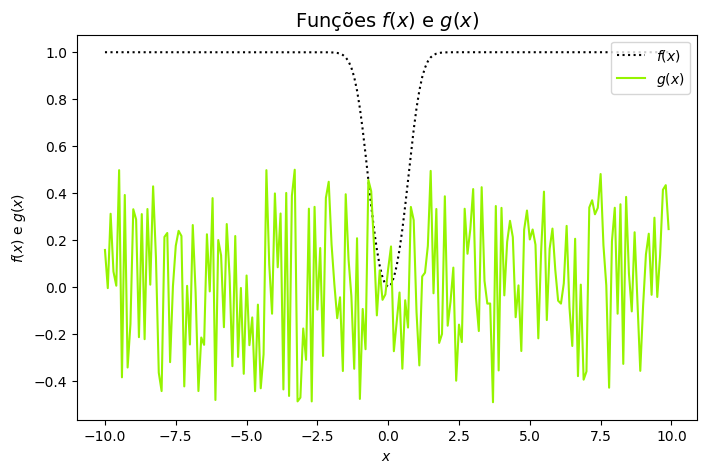

In [ ]:
x = np.arange(-10.0,10.0,0.1)
y = np.random.sample(len(x)) - 0.5

plt.figure(figsize=(8,5))

plt.plot(x, np.tanh(x**2), color='#000000', linestyle=':', label='$f(x)$')
plt.plot(x, y, color='#95f400', linestyle='-', label='$g(x)$')

plt.title('Funções $f(x)$ e $g(x)$',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$f(x)$ e $g(x)$')
plt.legend(loc='upper right')
plt.show()

# Exercício 2  

Produza 4 gráficos do Matplotlib envolvendo o conjunto de dados abaixo em mesma figura 12x8. Empregue o modo `Artist Layer`.

Produza na **primeira linha** de gráficos

> (a) Um gráfico com os 4 sinais `signal_s*` no tempo, rotulando cada linha

> (b) Um gráfico de densidade do `signal_mean`

Produza na **segunda linha** de gráficos

> (a) Um gráfico com o sinal `signal_mean` no tempo

> (b) Um boxplot de `signal_mean`

Não deixe de incluir título e rótulos para os eixos em cada gráfico.


In [ ]:
#@markdown Apenas Execute
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df = df[ df.region == 'parietal']
df = df[ df.event == 'stim']

dfn = df[ df.subject == 's0'].copy()
dfn.drop(columns=['region','event','subject'],inplace=True)
dfn.columns = ['timepoint','signal_s0']
dfn['signal_s1'] = df[ df.subject == 's1'].signal.values
dfn['signal_s2'] = df[ df.subject == 's2'].signal.values
dfn['signal_s3'] = df[ df.subject == 's3'].signal.values
dfn['signal_mean'] = dfn.mean(axis=1).values
df = dfn.reset_index(drop=True)


In [ ]:
df.head()

,timepoint,signal_s0,signal_s1,signal_s2,signal_s3,signal_mean
0,0,-0.039327,-0.064454,-0.034407,-0.008576,-0.029353
1,1,-0.035735,-0.074402,-0.042087,-0.061460,0.157263
2,2,0.009642,-0.035153,0.008791,-0.110565,0.374543
3,3,0.086399,0.092221,0.108916,-0.089708,0.639566
4,4,0.154058,0.287294,0.196461,0.027879,0.933138


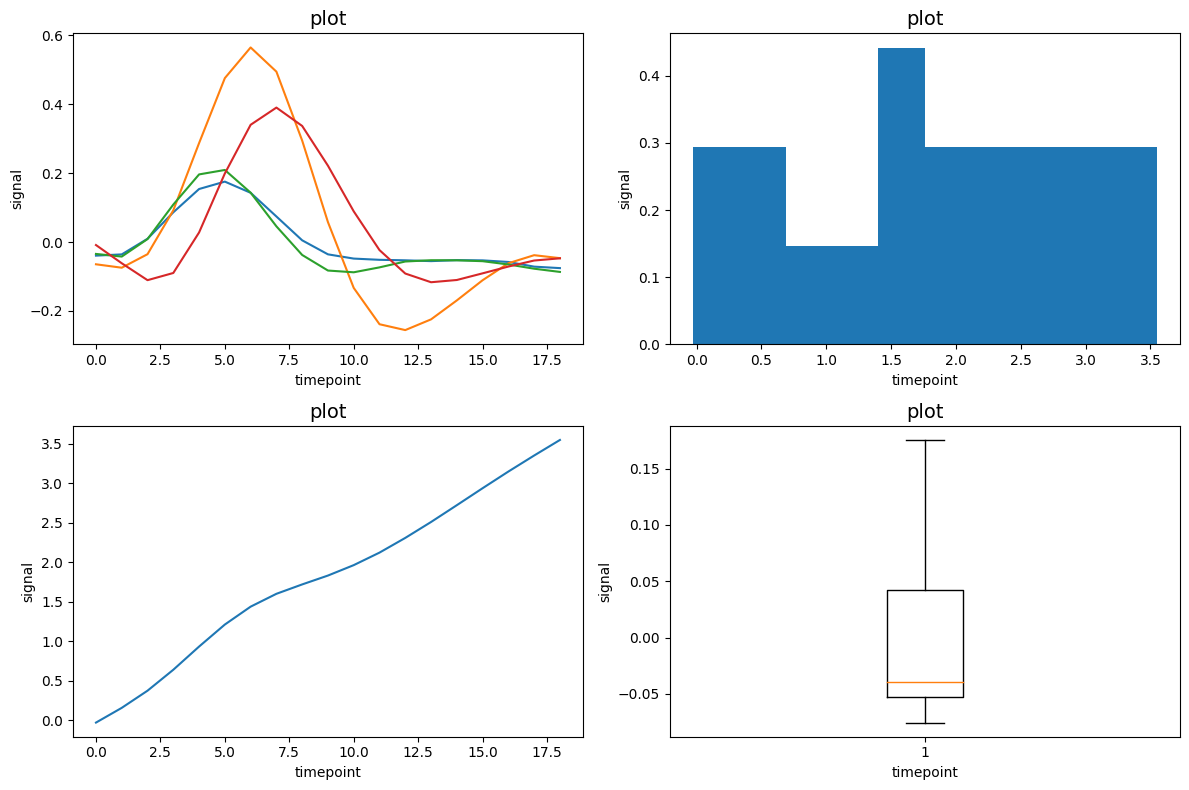

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

ax[0,0].plot(df.timepoint, df.signal_s0, label='s0')
ax[0,0].plot(df.timepoint, df.signal_s1, label='s1')
ax[0,0].plot(df.timepoint, df.signal_s2, label='s2')
ax[0,0].plot(df.timepoint, df.signal_s3, label='s3')
ax[0,0].set_title('plot',fontsize=14)
ax[0,0].set_xlabel('timepoint')
ax[0,0].set_ylabel('signal')

ax[0,1].hist(df.signal_mean,density=True)
ax[0,1].set_title('plot',fontsize=14)
ax[0,1].set_xlabel('timepoint')
ax[0,1].set_ylabel('signal')

ax[1,0].plot(df.timepoint, df.signal_mean)
ax[1,0].set_title('plot',fontsize=14)
ax[1,0].set_xlabel('timepoint')
ax[1,0].set_ylabel('signal')

ax[1,1].boxplot(df.signal_s0)
ax[1,1].set_title('plot',fontsize=14)
ax[1,1].set_xlabel('timepoint')
ax[1,1].set_ylabel('signal')

plt.tight_layout()
plt.show()

# Exercício 3  

Produza 2 gráficos do Matplotlib em uma mesma linha envolvendo o conjunto de dados abaixo em mesma figura 12x4. Empregue o modo `Script Layer`.

> (a) Um histograma de cada um dos valores `setosa`, `virginica` e `versicolor` rotulados

> (b) Um boxplot de cada um dos valores `setosa`, `virginica` e `versicolor`

>> Empregue `positions=[i]` para posicionar o `boxplot` na i-ésima posição do eixo x
>> Empregue em seguida `plt.xticks([1,2,3],['setosa','virginica','versicolor'])` para setar os rótulos no eixo x

Não deixe de incluir título e rótulos para os eixos em cada gráfico.

<br>

Em seguida responda a pergunta na caixa de texto abaixo

In [ ]:
#@markdown Apenas Execute
df = sns.load_dataset('iris')

dfn = pd.DataFrame()
dfn['setosa'] = df[ df.species == 'setosa' ]['petal_length'].values
dfn['virginica'] = df[ df.species == 'virginica' ]['petal_length'].values
dfn['versicolor'] = df[ df.species == 'versicolor' ]['petal_length'].values

df = dfn



In [ ]:
df.head()

,setosa,virginica,versicolor
0,1.4,6.0,4.7
1,1.4,5.1,4.5
2,1.3,5.9,4.9
3,1.5,5.6,4.0
4,1.4,5.8,4.6


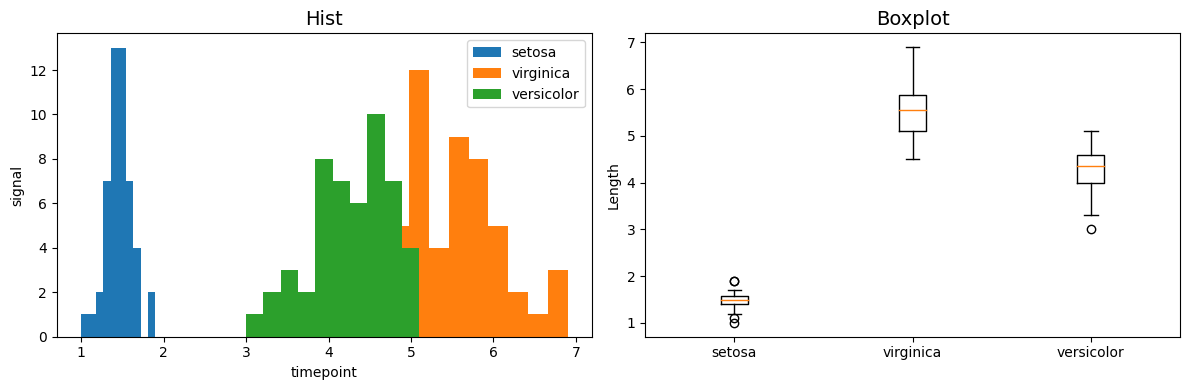

In [ ]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df.setosa, label='setosa')
plt.hist(df.virginica, label='virginica')
plt.hist(df.versicolor, label='versicolor')
plt.title('Hist',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.legend()

plt.subplot(1,2,2)
plt.boxplot(df.setosa, positions=[1])
plt.boxplot(df.virginica, positions=[2])
plt.boxplot(df.versicolor, positions=[3])
plt.title('Boxplot',fontsize=14)
plt.xticks([1,2,3],['setosa','virginica','versicolor'])
plt.xlabel('')
plt.ylabel('Length')

plt.tight_layout()
plt.show()

**Pergunta** Qual espécie, `setosa`, `virginica` ou `versicolor`, é mais separável pelas medidas empregadas?

**Sua Resposta**: `setosa`